In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks/starbucks.csv


In [2]:
sb_data = pd.read_csv('/kaggle/input/starbucks/starbucks.csv')
sb_data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [3]:
sb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
print(sb_data.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [5]:
sb_data[' Total Fat (g)'] = sb_data[' Total Fat (g)'].str.replace(' ', '').astype(float)
sb_data['Caffeine (mg)'].fillna(0,inplace=True)


# Calories analysis

In [6]:
calories_max = sb_data[sb_data['Calories'] == sb_data['Calories'].max()]
calories_max

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150


In [7]:
calories_min = sb_data[sb_data['Calories'] == sb_data['Calories'].min()]
calories_min

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


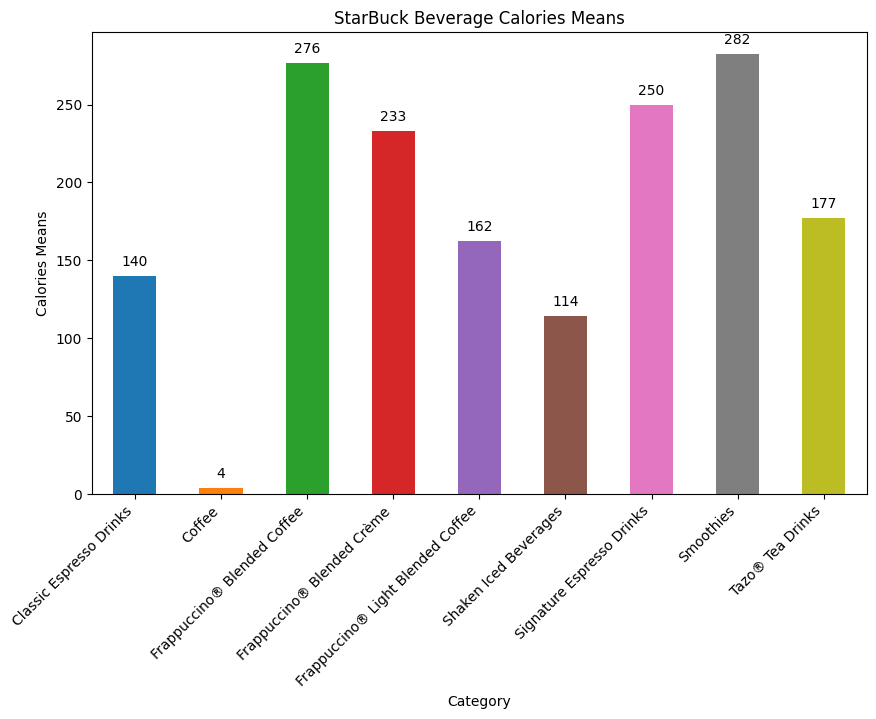

In [8]:

import matplotlib.pyplot as plt
c_mean_bytype = sb_data.groupby('Beverage_category')['Calories'].mean()
plt.rcParams['font.size'] = 10
plt.figure(figsize=(10,6))

# 获取默认颜色列表
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


ax = c_mean_bytype.plot(kind = 'bar',color = default_colors)
plt.title('StarBuck Beverage Calories Means')
plt.xlabel('Category')
plt.ylabel('Calories Means')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 将横轴标签旋转45度

plt.xticks(rotation=45,ha='right')
plt.show()

# Total Fat analysis

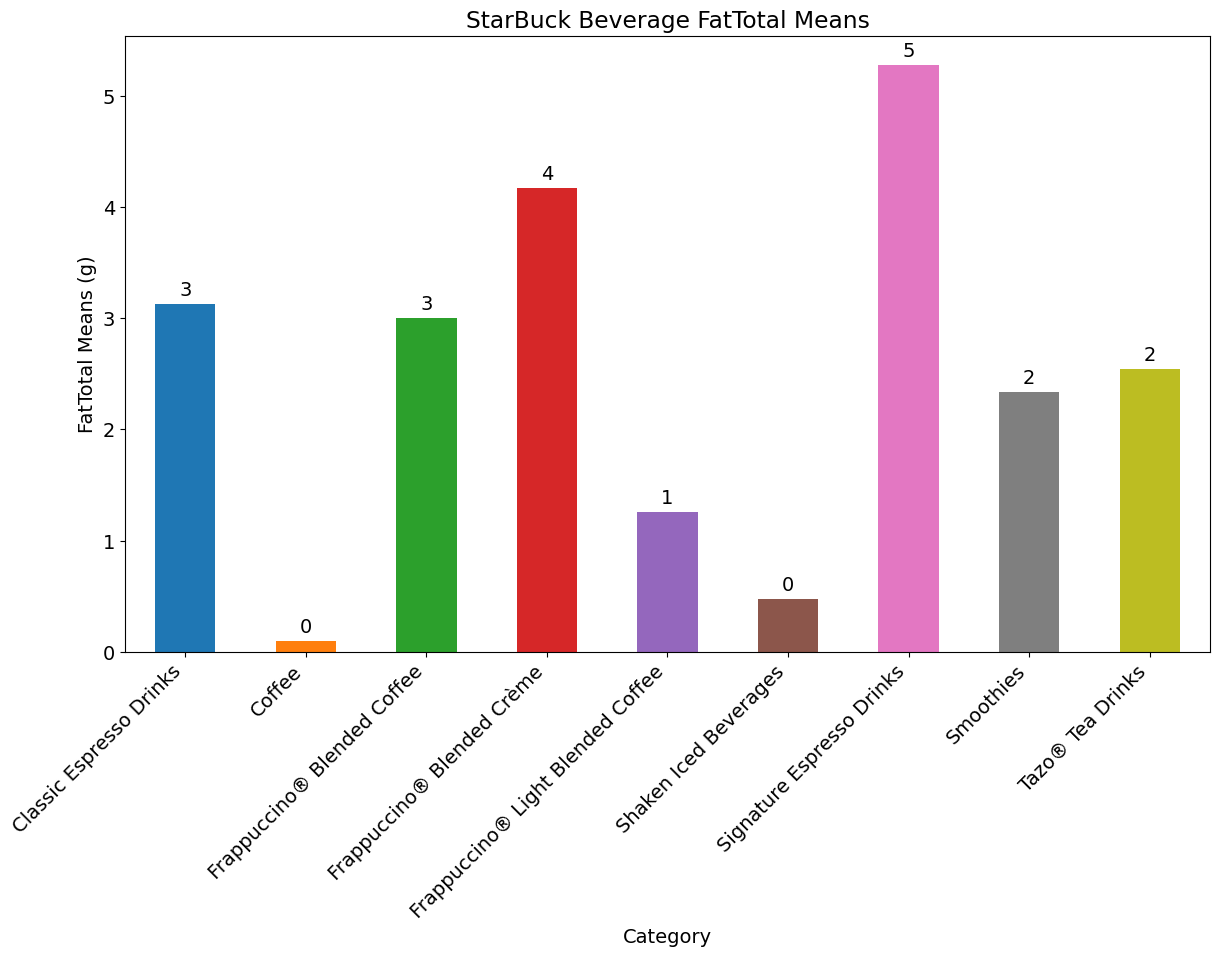

In [9]:
tf_mean_bytype = sb_data.groupby('Beverage_category')[' Total Fat (g)'].mean()
plt.rcParams['font.size'] = 14
plt.figure(figsize=(14,8))
ax = tf_mean_bytype.plot(kind='bar',color=default_colors)
plt.title('StarBuck Beverage FatTotal Means')
plt.xlabel('Category')
plt.ylabel('FatTotal Means (g)')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 将横轴标签旋转45度

plt.xticks(rotation=45,ha='right')
plt.show()

# Beverage category percent

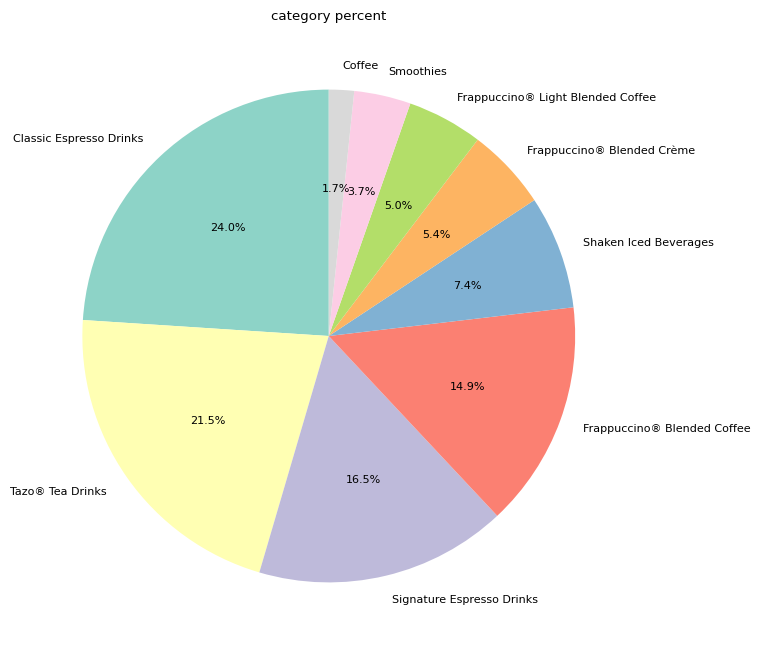

In [10]:
category_counts = sb_data['Beverage_category'].value_counts()
plt.rcParams['font.size'] = 8
plt.figure(figsize=(8,8))
plt.pie(category_counts,labels = category_counts.index,autopct='%1.1f%%',startangle=90,colors = plt.cm.Set3.colors)
plt.title('category percent')
plt.show()

# Calories VS Total Carbohydrates (g) in All Baverage

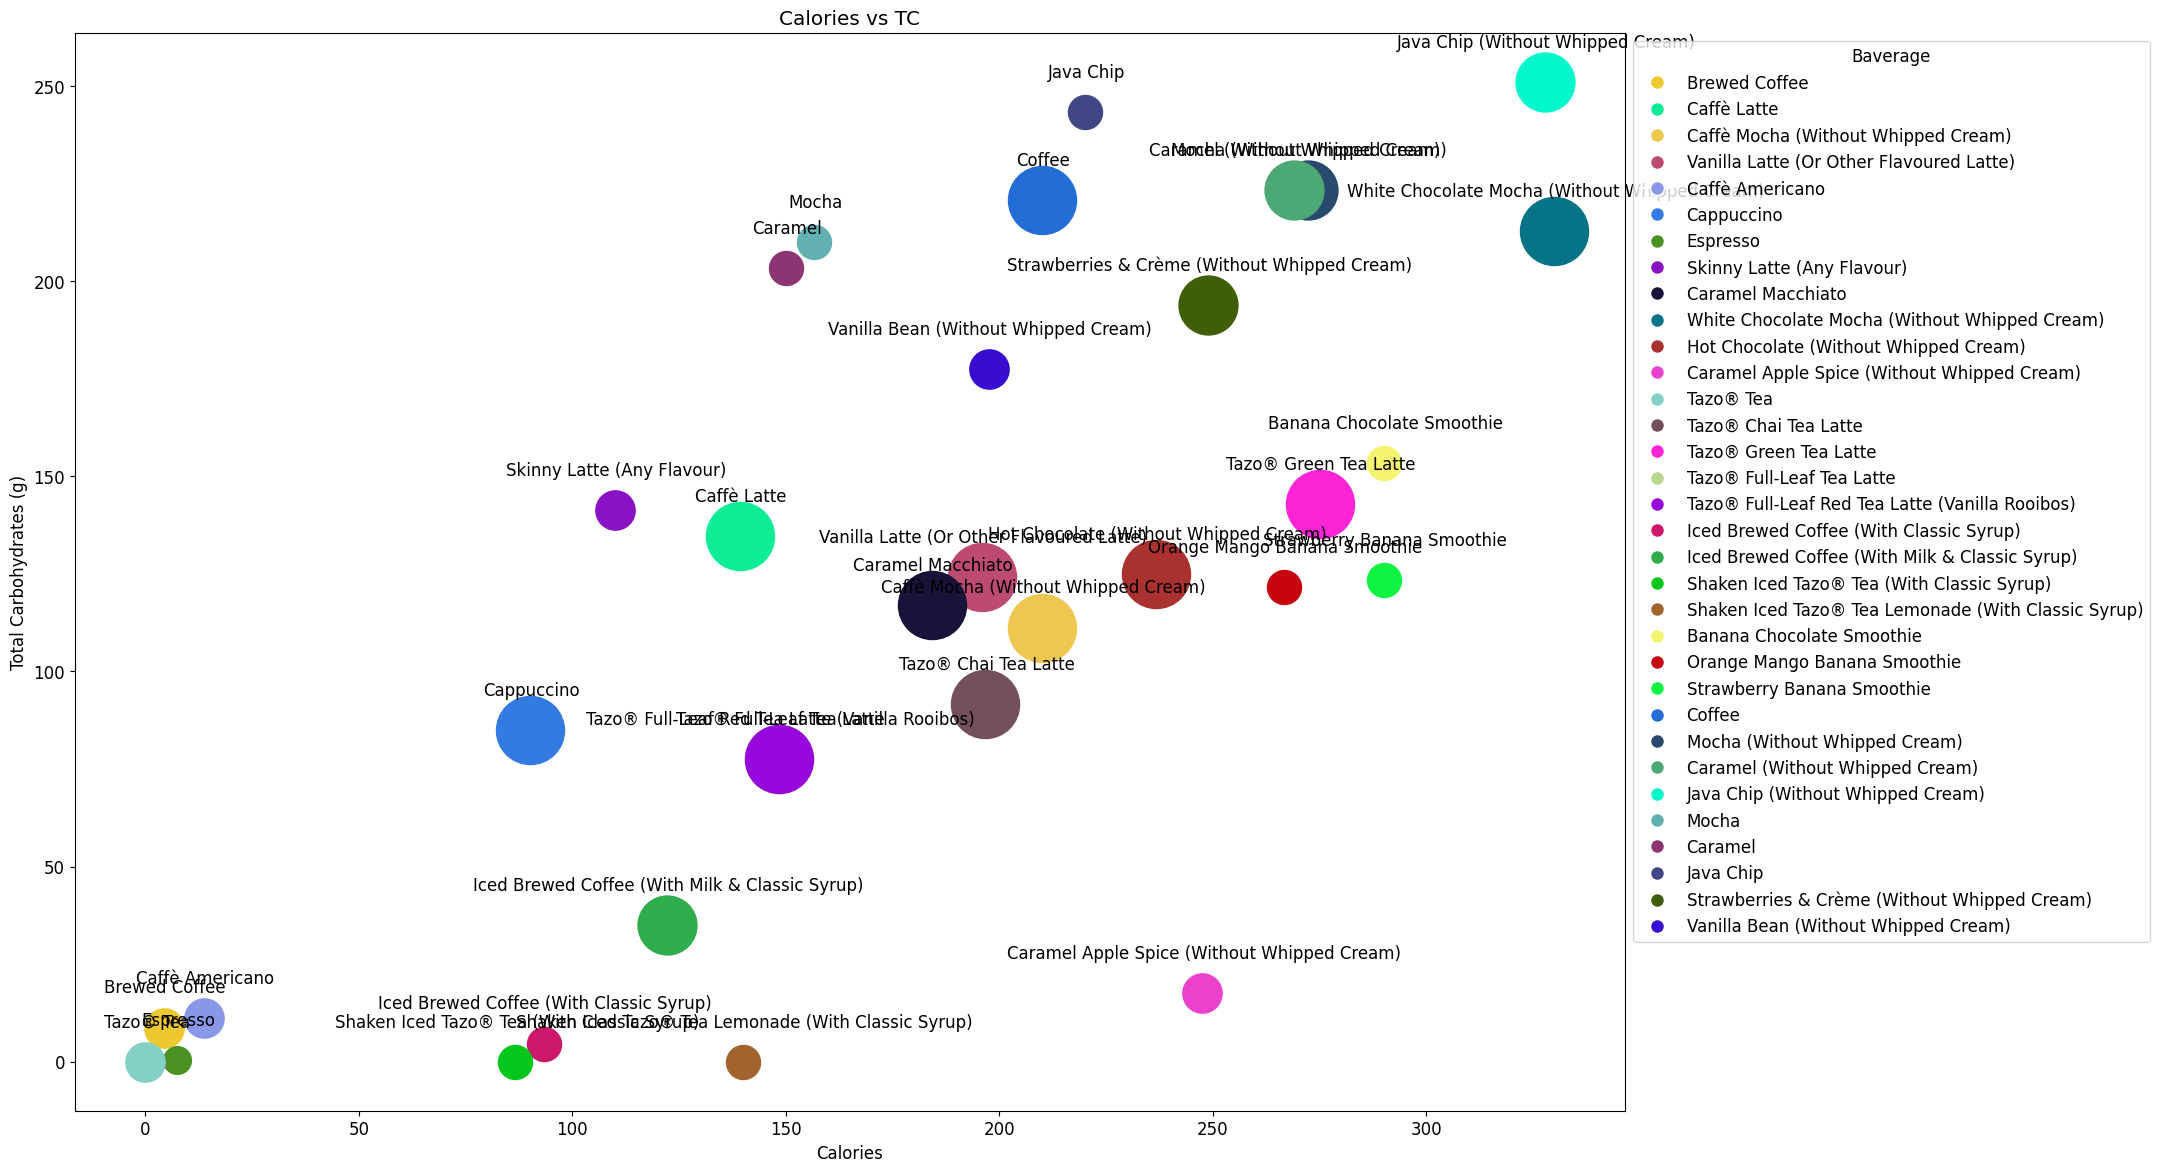

In [11]:
#查看饮料的卡路里和总碳水都比较高的一些饮料

sizes = sb_data['Beverage'].value_counts().to_dict()
plt.rcParams['font.size'] = 12

plt.figure(figsize=(20,14))

unique_category = sb_data['Beverage'].unique()
colors = dict(zip(unique_category, np.random.rand(len(unique_category), 3)))

for i in unique_category:
    category_data = sb_data[sb_data['Beverage'] ==i]
    
    mean_c = category_data['Calories'].mean()
    mean_tc = category_data[' Total Carbohydrates (g) '].mean()
    
    size = len(category_data)
    
    plt.scatter(mean_c,mean_tc,label = i,color = colors[i],s=size*200)
    plt.annotate(i,(mean_c,mean_tc),textcoords='offset points',xytext=(1,25),ha ='center')
    

plt.title('Calories vs TC')
plt.xlabel('Calories')
plt.ylabel('Total Carbohydrates (g)')

# 手动创建 legend，指定标记的大小
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=colors[category], markersize=10) for category in unique_category]
plt.legend(handles=legend_handles, title='Baverage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()